DATASET: [Diabetes Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

In [3]:
# LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PREPROCESSING
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# MODEL
from sklearn.ensemble import RandomForestClassifier

# EVALUASI
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## **LOAD DATASET**

In [4]:
url = "https://drive.google.com/file/d/10ha_57RZFHlmR37Ycp5_SzuB_MiBeReM/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [5]:
diabetes_df = pd.read_csv(path)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



### FEATURE DESKRIPSI
1. **Kehamilan (Pregnancies)**: Jumlah kehamilan yang pernah dialami oleh individu.  
2. **Glukosa (Glucose)**: Konsentrasi glukosa plasma (gula darah) yang diukur dalam satuan mg/dL.
3. **Tekanan Darah (Blood Pressure)**: Tekanan darah diastolik, diukur dalam mmHg (millimeter merkuri).
4. **Kekebalan Kulit (Skin Thickness)**: Ketebalan lipatan kulit subkutan, diukur dalam milimeter (mm).
5. **Insulin**: Konsentrasi insulin serum (hormon pengatur gula darah) dalam satuan μU/mL.
6. **BMI (Body Mass Index)**: Indeks massa tubuh  
7. **Diabetes Silsilah Fungsi (DiabetesPedigreeFunction)**: Ukuran yang menggambarkan pengaruh riwayat keluarga terhadap risiko diabetes, berdasarkan hubungan genetik.
8. **Usia (Age)**: Usia individu dalam tahun.  
9. **Hasil (Outcome)**: Label kelas untuk prediksi diabetes, berupa nilai biner:
0: Tidak menderita diabetes.
1: Menderita diabetes.


## **PREPROCESSING DATA**

In [6]:
# Mengganti Nama Kolom Dalam Bahasa Indonesia
features_indonesia = [
   "Kehamilan",
   "Glukosa",
   "Tekanan Darah",
   "Kekebalan Kulit",
   "Insulin",
   "BMI",
   "Diabetes Silsilah Fungsi",
   "Usia",
   "Hasil"
]

diabetes_df.columns = features_indonesia
diabetes_df.head()

,Kehamilan,Glukosa,Tekanan Darah,Kekebalan Kulit,Insulin,BMI,Diabetes Silsilah Fungsi,Usia,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **DATA CLEANING**

In [7]:
# mengecek ukuran, nilai null, dan nilai duplicated pada dataset
print(f"Jumlah Data: {diabetes_df.shape[0]}")
print(f"Jumlah Nilai Null: {diabetes_df.isnull().sum().sum()}")
print(f"Jumlah Nilai Duplicated: {diabetes_df.duplicated().sum()}")

Jumlah Data: 768
Jumlah Nilai Null: 0
Jumlah Nilai Duplicated: 0


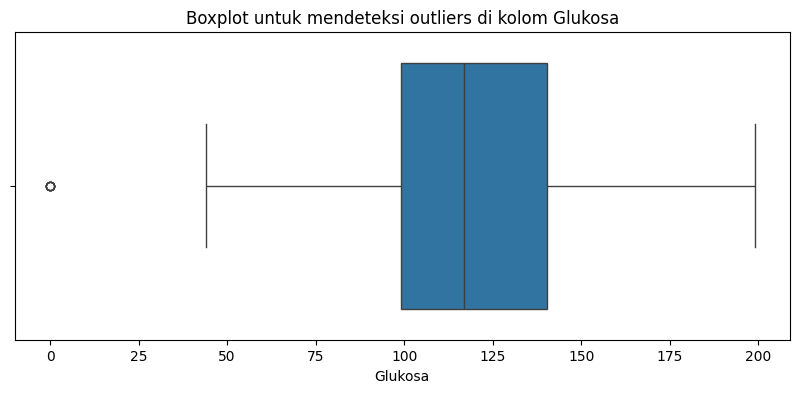


Jumlah outliers: 5
Nilai outliers: 
[0 0 0 0 0]


In [8]:
def check_outliers(df, column):
    # Visualisasi dengan boxplot
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot untuk mendeteksi outliers di kolom {column}')
    plt.show()

    # Hitung outliers dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"\nJumlah outliers: {len(outliers)}")
    print(f"Nilai outliers: \n{outliers.values}")

check_outliers(diabetes_df, 'Glukosa')

### **ENCODE KOLOM KATEGORIK**

---



In [9]:
# membuat list yang masing masing berisi data kategorik dan numerik
categorical_features = diabetes_df.select_dtypes(include=["object"]).columns.to_list()
numerical_features = diabetes_df.select_dtypes(exclude=["object"]).columns.to_list()

print(f"Jumlah Kolom Numerik: {len(numerical_features)}")
print(f"Kolom: {numerical_features}\n")
print(f"Jumlah Kolom Kategorik: {len(categorical_features)}")
print(f"Kolom: {categorical_features}")

Jumlah Kolom Numerik: 9
Kolom: ['Kehamilan', 'Glukosa', 'Tekanan Darah', 'Kekebalan Kulit', 'Insulin', 'BMI', 'Diabetes Silsilah Fungsi', 'Usia', 'Hasil']

Jumlah Kolom Kategorik: 0
Kolom: []


In [10]:
diabetes_df.head()

,Kehamilan,Glukosa,Tekanan Darah,Kekebalan Kulit,Insulin,BMI,Diabetes Silsilah Fungsi,Usia,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **TRANSFORM DATA NUMERIC**

In [11]:
# standarisasi fitur
scaler = StandardScaler()
diabetes_df[numerical_features] = scaler.fit_transform(diabetes_df[numerical_features])
diabetes_df.head()

,Kehamilan,Glukosa,Tekanan Darah,Kekebalan Kulit,Insulin,BMI,Diabetes Silsilah Fungsi,Usia,Hasil
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


## **EXPLORATORY DATA ANALYSIS**

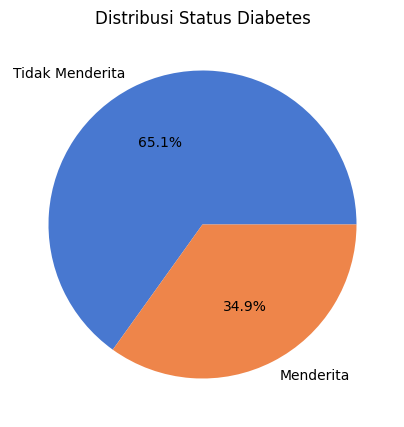

In [12]:
# pie Chart
plt.figure(figsize=(5, 5))
x = diabetes_df['Hasil'].value_counts()

plt.pie(x=x.values,
        labels=['Tidak Menderita', "Menderita"],
        autopct='%1.1f%%',
        colors=sns.color_palette('muted'))

plt.title('Distribusi Status Diabetes')
plt.show()

<ipython-input-13-81b7eab8af91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diabetes_df, x="Hasil", palette='pastel')


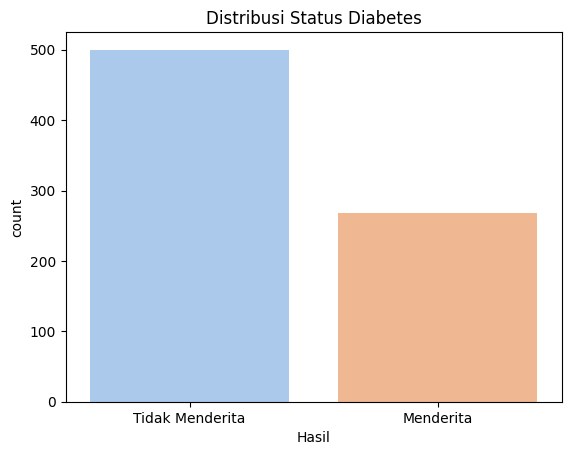

In [13]:
# bar Chart
sns.countplot(data=diabetes_df, x="Hasil", palette='pastel')
plt.title("Distribusi Status Diabetes")

plt.xticks(ticks=[0, 1], labels=[ "Tidak Menderita", "Menderita"])
plt.show()

### **FEATURE SELECTION**

In [14]:
# mengecek informasi dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    float64
 1   Glukosa                   768 non-null    float64
 2   Tekanan Darah             768 non-null    float64
 3   Kekebalan Kulit           768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   Diabetes Silsilah Fungsi  768 non-null    float64
 7   Usia                      768 non-null    float64
 8   Hasil                     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [15]:
# menentukan kolom target dan feature
X = diabetes_df.drop('Hasil', axis=1)
y = diabetes_df['Hasil']

# Pilih k fitur terbaik
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(X, y)

# Tampilkan skor setiap fitur
scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Skor setiap fitur:")
print(scores)

# Pilih fitur terbaik
selected_features = X.columns[selector.get_support()].tolist()
print("\nFitur terbaik:")
print(selected_features)

Skor setiap fitur:
                    Feature       Score
1                   Glukosa  213.161752
5                       BMI   71.772072
7                      Usia   46.140611
0                 Kehamilan   39.670227
6  Diabetes Silsilah Fungsi   23.871300
4                   Insulin   13.281108
3           Kekebalan Kulit    4.304381
2             Tekanan Darah    3.256950

Fitur terbaik:
['Kehamilan', 'Glukosa', 'Tekanan Darah', 'Kekebalan Kulit', 'Insulin', 'BMI', 'Diabetes Silsilah Fungsi', 'Usia']


In [16]:
# UPDATE X
X = diabetes_df[selected_features]
y = diabetes_df['Hasil']

### **Handling Imbalanced Data**

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Pastikan y adalah array numerik jika belum
le = LabelEncoder()
y = le.fit_transform(y)  # Jika y adalah kategori, ubah menjadi numerik

# Cek distribusi kelas sebelum SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(pd.Series(y).value_counts())  # Konversi y ke Series untuk menggunakan value_counts()

# Terapkan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Tampilkan distribusi kelas setelah SMOTE
print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_balanced).value_counts())  # Konversi y_balanced ke Series untuk menggunakan value_counts()


Distribusi kelas sebelum SMOTE:
0    500
1    268
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
1    500
0    500
Name: count, dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced,
    y_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_balanced
)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji: {len(X_test)}")

Jumlah Data Latih: 800
Jumlah Data Uji: 200


## **MODELING**

In [19]:
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

## **EVALUASI MODEL**

In [20]:
y_pred = random_forest_model.predict(X_test)
print(f"Akurasi:{ accuracy_score(y_test, y_pred) : .2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Akurasi: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       100
           1       0.80      0.85      0.83       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



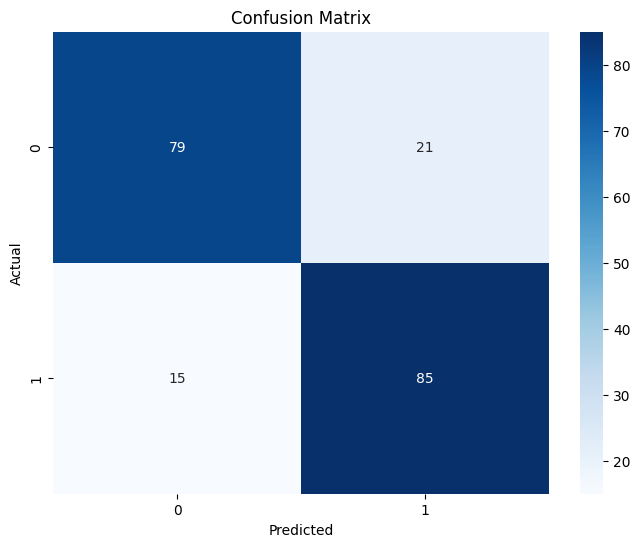

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **EXPORT MODEL dan SCALLER**

In [22]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [23]:
from google.colab import files

# Unduh model.pkl
files.download('model.pkl')

# Unduh scaler.pkl
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import sys
import pickle

# Cek ukuran model
model_size = sys.getsizeof(pickle.dumps(random_forest_model))
print(f"Ukuran model: {model_size / 1024 / 1024:.2f} MB")

Ukuran model: 1.91 MB
